# Analysis of airfare data between Frankfurt-New York
------
## Background Information
------
Today’s internet-based distribution of tickets makes it easy for passengers to compare fares and book tickets from different airlines. At the same time, it allows airlines to assess competitors’ prices accurately and in real time. This project presents a method to support airline pricing strategies through the analysis of fares collected by the developed prototype. 

On the route Frankfurt–New York City 54,000 nonstop fare quotes were collected to investigate the dynamics of price-setting behaviour as the departure date draws nearer. The method incorporates a descriptive analysis and a correlational research which are used to reveal patterns or other contiguities within the data set. 
The intertemporal profile of airlines suggests similar pricing strategies across airlines throughout the observation period. Airlines with lower market shares seem to follow the price-setting of airlines with higher market shares. This becomes particularly evident as the departure date approaches. Moreover, the correlational research carried out provides further evidence for competitive analysis in the airline industry as it reveals linear and non-linear correlations between most airlines.

_Keywords: airfare, pricing strategies, price dispersion, fare analysis_

## Data Collection
------
With the observation of a fixed time window on a specific route, it is possible to detected changes within fares as time
passes. This not only allows an effective investigation of pricing behaviour, but offers as well insights into other areas such as flight frequencies and schedules, code-share services or operated aircraft.

| Days before departure 	| Intervals               	|
|-----------------------	|-------------------------	|
| 59 days               	| $(I_0)$                 	|
| 58 days               	| $(I_0, I_1)$            	|
| 57 days               	| $(I_0, I_1, I_2)$       	|
| ...                   	| ...                     	|
| 0 days                	| $(I_0, I_1, ..., I_59)$ 	|

### Interval Sample Size
------
When grouping observations into an interval such as days before departure, a varying number of fare quotes will be collected, which however, usually increases as the departure date draws nearer. Assuming that flights will never be sold out, the smallest interval (e.g. same-day departures) would have the most observations compared to any other interval – the highest interval on the other hand (start of the data collection) will have lowest number of observations.
<img src="figures/FlightCollection.png" />
This is the result of how the method collects data within a fixed time window – in essence, it "fills up" the intervals every day.
As the above Table shows, every collected fare quote presents at some point a different interval ($i_\Delta$) depending only on the date the fare quote was collected.

For instance, assume an identical collection window as provided in the Figure above.
Basically, each $r_n$ belongs to a different interval which is dependent on the collection date. Hence, an interval can be described as follows: 

$I = s − c$  

where

- $I$ : interval (days before departure)
- $s$ : date of the fare (flight departure)
- $c$ : date on which the fare quote was collected (date of purchase)

For example, the fare quotes for the flights departing on 25/02/2015 and returning on 04/03/2015 would fall into two intervals. First, the fare quotes collected on 24/02/2015 would be assigned to the interval hI1i. As for the fare quotes collected a day later (25/02/2015), they would belong to the interval hI0i. Therefore, when collecting fare quotes for 60 days, the initial requests would fill fare quotes into all intervals $(I_0, I_1, ..., I_59)$  whilst on the next day of collection one interval less would be filled $(I_0, I_1, ..., I_58)$. When reaching the last day of collection, the fare quotes collected are same-day flights and therefore within the interval $I_0$. With every day, the amount of fare quotes per interval increases and therefore strengthens both the reliability and the accuracy of the analysis. 

The calculation of observations per day would be problematic and very tedious not only because the number of scheduled flights and published fares per route varies, but also because of the constantly changing availability of flights and fares. 
However, under the assumption of unlimited availability and schedules it is possible to create a positive increasing linear model:

$obsI = f*x + (t*f)$ where $I = s − c$

where

- $obsI$ : observations on day d
- $f$ : fare quotes per day
- $I$ : interval
- $s$ : date of the fare (flight departure)
- $c$ : date on which the fare was collected


## Data Background
------
The collected data set contains fare quotes for a return trip between **FRA–NYC**, spans from 60 to one day prior to the flight departure and contains 54,547 fare observations.
All fare quotes were obtained on a daily basis and always at the same time (midnight 12:00a.m. UTC+1) starting from **February 24 to April 24, 2015 (60 days)**.

Each collected fare applies to a **7-day stay non-stop return trip** and only **economy class** fares are taken into account. All the flights scheduled and offered between February 24 and April 24, 2015 were taken into account for the observation.

During the collection period, six major carriers were offering fares: 
- Lufthansa (LH)
- United Airlines (UA)
- Singapore Airlines (SQ) 
- Delta Air Lines (AL) 
- Air France (AF) 
- KLM Royal Dutch Airlines (KLM) 

However KLM and AF were selling tickets operated by DL only under a code-share agreement – rather than operating non-stop flights themselves. DL flights are not included as this carrier restricted access to its fare quotes for commercial purposes only. Controversially, KLM and AF offered the restricted flights operated by DL under code-share agreements. However, it remains unclear to which extent these prices are similar to those published by DL. A weekly manual verification
during the collection period showed no or only slight differences between the prices of DL, AF and KLM.
The cause of the discrepancy between the summary statistics of AF and KLM can only be partially explained. As DL offered only one service per day on the route FRA–JFK and vice versa, AF and KLM usually offered one fare each too.

However, AF did not offer these fares on several days on what seemed to be random occasions. This could mean that KLM had sold less seats than AF or that the realised SLF was already so high that no more seats were made available to AF.
<p style="text-align:center;margin:10px;"><img src="figures/DataFlightPaths.png" style="padding:10px;" alt="Airlines Operating on FRA-NYC Market (non-stop)"/><em>Airlines Operating on FRA-NYC Market (non-stop)</em></p>

As shown in the Figure all airlines were offering fares on the O-D market FRA–JFK, only two of them, LH and UA, were offering flights to EWR and none had scheduled flights to LGA. LH, UA and SQ are members of the Star Alliance while
DL, KLM and AF are members of SkyTeam and no airline in the data set was without an alliance.

It is notable that LH and UA as well as AF, KLM and DL had existing code-share agreements, which resulted not only in multiple offers for the exact same flight, but also made it possible that each segment of a trip was operated by the other codesharing partner. Multiple carrier flights without code-share agreements between the carriers are excluded from the data set as such flights would include two one-way fares. Within the data set, a specific distinction was made between these two scenarios by recording both the publishing and operating airline of a fare.

## Data Analysis
------
### Data Structure
------
Our data set contains of every request collected, an each request lead to several trips. Each trip as two rows, a trip to the destination and a trip back to the origin of the trip.

In [7]:
# import libraries
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

# libraries and settings
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# set config seaborn
sns.set(style="whitegrid", color_codes=True)

 # fix random seed to get same numbers
np.random.seed(555)

# path to the csv
path = r'/home/ubuntu/notebooks/AirFare/Data/tripRequest.csv'

# set dataFrame
airfare = pd.read_csv(path, 
                        sep=';', 
                        usecols=['trip_id', 'package', 'tripStartDeparture', 'tripDestinationDeparture', 'origin', 'destination',
                                 'flightCarrier', 'flightNumber', 'cabin', 'saleTotal', 'mileage', 'meal',
                                 'tripDuration', 'saleTotal', 'operatingDisclosure', 
                                 'marriedSegmentGroup', 'bookingCode', 'bookingCodeCount'])
airfare['package'] = pd.to_datetime(airfare['package'], format='%d-%m-%Y')
airfare['tripStartDeparture'] = pd.to_datetime(airfare['tripStartDeparture'], format='%Y-%m-%d %H:%M:%S')
airfare['tripDestinationDeparture'] = pd.to_datetime(airfare['tripDestinationDeparture'], format='%Y-%m-%d %H:%M:%S')

# first rows
airfare.head()

,package,trip_id,saleTotal,tripStartDeparture,tripDestinationDeparture,tripDuration,cabin,bookingCode,bookingCodeCount,marriedSegmentGroup,flightCarrier,flightNumber,origin,destination,operatingDisclosure,mileage,meal
0,2015-02-24,103973,477.99,2015-02-24 13:45:01,2015-03-03 19:31:05,540,COACH,V,9,0,KL,6107,FRA,JFK,OPERATED BY DELTA,3844,Lunch
1,2015-02-24,103973,477.99,2015-02-24 13:45:01,2015-03-03 19:31:05,499,COACH,V,9,1,KL,6106,JFK,FRA,OPERATED BY DELTA,3844,Dinner
2,2015-02-24,103976,477.99,2015-02-24 13:45:01,2015-03-03 19:31:05,540,COACH,V,9,0,AF,3660,FRA,JFK,OPERATED BY DELTA,3844,Lunch
3,2015-02-24,103976,477.99,2015-02-24 13:45:01,2015-03-03 19:31:05,499,COACH,V,9,1,AF,3581,JFK,FRA,OPERATED BY DELTA,3844,Dinner
4,2015-02-24,103977,556.31,2015-02-24 08:20:01,2015-03-03 20:25:05,535,COACH,K,9,0,SQ,26,FRA,JFK,NaN,3844,Meal


#### Data Types

In [8]:
airfare.dtypes

package                     datetime64[ns]
trip_id                              int64
saleTotal                          float64
tripStartDeparture          datetime64[ns]
tripDestinationDeparture    datetime64[ns]
tripDuration                         int64
cabin                               object
bookingCode                         object
bookingCodeCount                     int64
marriedSegmentGroup                  int64
flightCarrier                       object
flightNumber                         int64
origin                              object
destination                         object
operatingDisclosure                 object
mileage                              int64
meal                                object
dtype: object

#### Objects Summary
------

In [9]:
# Let's see what basic information we can get out of the data.
airfare.describe()

,trip_id,saleTotal,tripDuration,bookingCodeCount,marriedSegmentGroup,flightNumber,mileage
count,114080.000000,114080.000000,114080.000000,114080.000000,114080.000000,114080.000000,114080.000000
mean,194619.819846,862.715791,496.907556,5.919968,0.500000,4327.491339,3850.280181
std,50507.883484,259.191216,31.765464,2.614402,0.500002,4022.773340,6.496310
min,103973.000000,446.800000,455.000000,1.000000,0.000000,25.000000,3844.000000
25%,152118.250000,668.220000,460.000000,4.000000,0.000000,401.000000,3844.000000
50%,195336.000000,819.540000,502.500000,4.000000,0.500000,3660.000000,3844.000000
75%,238633.250000,981.460000,525.000000,9.000000,1.000000,8839.000000,3857.000000
max,279438.000000,2825.220000,545.000000,9.000000,1.000000,8843.000000,3857.000000


What we can see here that we have quite a dispersed _saleTotal_ variable, containing the all of our prices (<em>careful: double entries due to the "two-rows-per-trip" constraint</em>). Both, the _tripDuration_ and _mileage_ variables are relitvaily similiar due to the fact that we have only three different airports FRA, JFK and NEW.

The _bookingCodeCount_ variable represents the flight availaibility<sup>1</sup>, which might give us a small glance on the availaibilty of the fare. However, everything above or equal 9 represents a unknown level of availability. Hence, it could be 10 fares left, or even 100.

The _flightNumber_ variable indicates that there is alot of codeshare flights in the database. In most cases you can assume that __international__ codeshare flights have number above 1,000. However, this heaviliy depends on the airlines and might be wrong in other cases.

### Data Exploration
#### Offered Flights

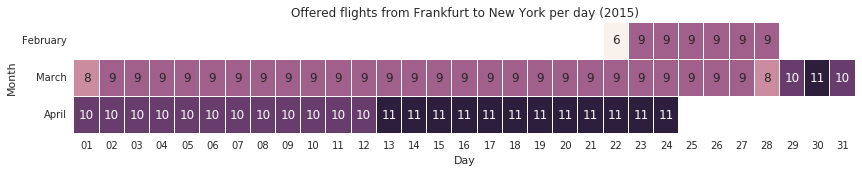

In [10]:
### flights offered
months = ["February", "March", "April"]

# get data set
flights_data = airfare

# group flights by departure to get the amount of flights per day
flightsPerDayDeparture = flights_data[['tripStartDeparture', 'tripDestinationDeparture', 'flightCarrier']]

## get the unique amount of flights per day grouped by the flight carrier
## unstack for the right format
flightsPerDayDeparture = flightsPerDayDeparture.groupby([pd.Grouper(freq='D', key='tripStartDeparture'), 'flightCarrier'])
flightsPerDayDeparture = flightsPerDayDeparture['tripStartDeparture'].apply(lambda x: len(x.unique())).unstack()

# fill NaN with zero
flightsPerDayDeparture.fillna(0, inplace=True)

# create column sum and sum up all flights
flightsPerDayDeparture['flightsPerDay'] = (flightsPerDayDeparture.AF+flightsPerDayDeparture.KL+ 
                                           flightsPerDayDeparture.LH+flightsPerDayDeparture.SQ+ 
                                           flightsPerDayDeparture.UA)

# reset index for incremntal rather than tripStartDeparture
flightsPerDayDeparture.reset_index(inplace=True, drop=False)

# get month/day and reset the index for pivot
flightsPerDayDeparture['Month'] = flightsPerDayDeparture.tripStartDeparture.dt.strftime('%m')
flightsPerDayDeparture['Day'] = flightsPerDayDeparture.tripStartDeparture.dt.strftime('%d')

# rename counted column as a measure for the amout of flights
flightsPerDayDeparture = flightsPerDayDeparture[['Month', 'Day', 'flightsPerDay']]

# create pivot table
flights = flightsPerDayDeparture.pivot("Month", "Day",  "flightsPerDay")

# adjust size of figure and output heatmap
sns.mpl.rc("figure", figsize=(14,2))
sns.plt.title('Offered flights from Frankfurt to New York per day (2015)')
sns.heatmap(flights, annot=True, yticklabels=months, fmt='g', linewidths=0.1, cbar=False)

The figure above shows the offered flights from Frankfurt to New York between 22th of February and 24th of April. It is important to note that the amount of offered flights always is dependet on the time of request. When you look for flights for tomorrow the level of availibility of those flights might less than if you would check for flights in a week.

This might be the case for the 22nd of February where 6 flights were offered as the first request was done at the same day at midnight (22/02/2015 00:00). Afterwards the availability is between 9-11 throughout the observation.

#### Fares by Airlines

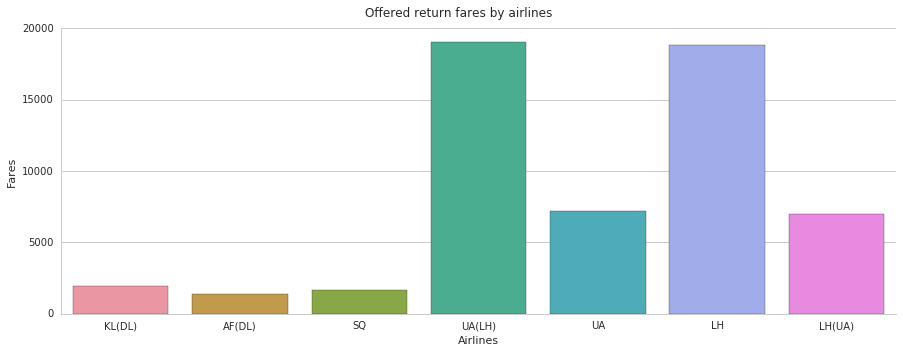

In [11]:
## get individual flights (just use the first segment of every trip)
flights = airfare.query('marriedSegmentGroup == 0').reset_index(drop=True)

# combine flightCarrier and rename operatingDisclosure
flights['operatingDisclosure'] = flights.operatingDisclosure.replace("OPERATED BY ", "", regex=True)
flights['operatingDisclosure'] = flights.operatingDisclosure.replace("DELTA", "(DL)", regex=True)
flights['operatingDisclosure'] = flights.operatingDisclosure.replace("LUFTHANSA", "(LH)", regex=True)
flights['operatingDisclosure'] = flights.operatingDisclosure.replace("UNITED", "(UA)", regex=True)
flights['operator'] = flights.flightCarrier.str.cat(flights.operatingDisclosure, na_rep='')

# print plot and set title
g = sns.factorplot(x="operator", kind="count", size=5, aspect=2.5, data=flights).set_axis_labels("Airlines", "Fares")
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Offered return fares by airlines')

LH and UA offered most return fares especially when including their codeshare fares. If we take a cloer look we can actually see that the codeshare flights nearly equals the actual flights. Followed by KL, SQ and AF fares. Even though KL and AF are operated by DL they have different amount of fares offered which suggest a stop sell on those fares for a specific period of time.

#### Prices of Airlines
Let's investigate the price structure of the fares offered by airlines.

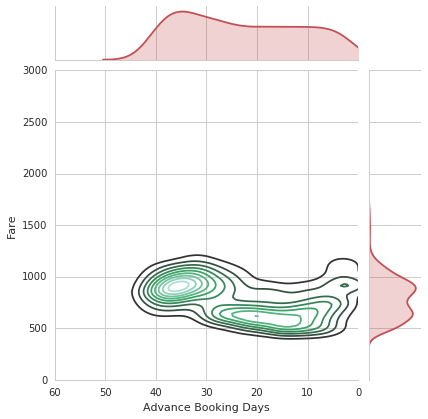

In [51]:
# lets add daysBeforeDeparture variable to the data frame flights
flights = flights[1:1000]
flights["daysBeforeDeparture"] = (flights.tripStartDeparture-flights.package).astype('timedelta64[D]')

#graph
color = sns.cubehelix_palette(light=1, as_cmap=True)
g= sns.JointGrid(x="daysBeforeDeparture", y="saleTotal", data=flights, xlim=(60,0))
g = g.plot_joint(sns.kdeplot)
g = g.plot_marginals(sns.kdeplot, color="r", shade=True)
g = g.set_axis_labels("Advance Booking Days", "Fare")
#sns.plt.gca().invert_xaxis()

## Limitations of the Research Design
------
Due to the research design, it is important to note that analysing round-trip fares may only cover a sub-set of the many possible return trips available in theory. A large number of fares are offered for any given departure date dependent on the length of stay. The definition of such a sub-set of fares (7 days return-trip) is necessary for
research design purposes and results are therefore arbitrary. One-way fares were not taken into account for the analysis.

The reason for this is that fares for round-trips offered by full-service carriers (FSCs) are in most cases
cheaper than the sum of the corresponding two one-way fares on the same route. The opposite would be the case if the data set included LCCs as those mainly employ one-way pricing strategies.

Other known limitations which influenced the results of this project are as follows. First, product differentiations were not considered, which, however, may be is captured to some extent by the price of the fare quote. Second, only the cheapest
available fare in the economy class for a specific flight combination were collected – which further limits the data set.  
In order to account for the two the destination airports in the data set, JFK and EWR, it is assumed that both can be treated as city-pairs rather than airportpairs.
Hence, it is possible to treat both airports as one destination.

## Further informations and references
------
<sup>1</sup> Flight Inventory (http://www.travelcodex.com/2012/02/understanding-airline-inventory/)